In [7]:
import pandas as pd
import numpy as np
import gudhi as gd
import gudhi.representations
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
from scipy.spatial import cKDTree

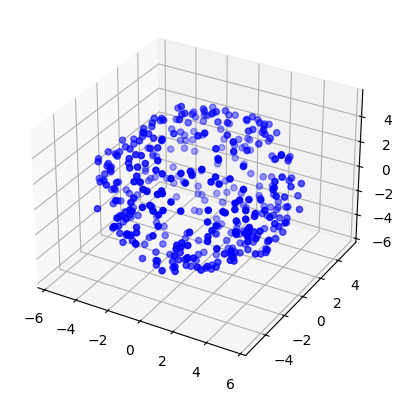

In [3]:
file_path = 'points12.csv'
points_df = pd.read_csv(file_path, header=None)
points_df.columns = ['X', 'Y', 'Z']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_df['X'], points_df['Y'], points_df['Z'], c='b', marker='o')

plt.show()

In [3]:
points = points_df.values

rips_complex = gd.RipsComplex(points=points, max_edge_length=3.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persistence = simplex_tree.persistence()

gd.plot_persistence_diagram(persistence)
plt.show()

betti_numbers = simplex_tree.betti_numbers()
print("Betti numbers:", betti_numbers)

NameError: name 'points_df' is not defined

Betti numbers: [1, 357]


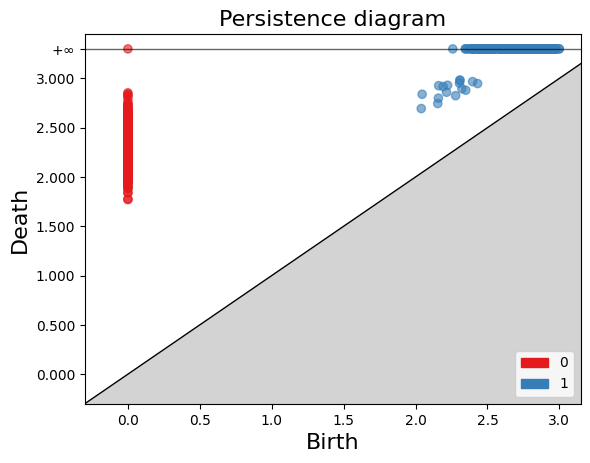

In [10]:
points_df = pd.read_csv('points400_2.csv', header=None)
rips_complex = gudhi.RipsComplex(points=np.array(points_df), max_edge_length = 3)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()
gudhi.plot_persistence_diagram(persistence)
betti_numbers = simplex_tree.betti_numbers()
print("Betti numbers:", betti_numbers)

/Users/francesmcconnell/Library/Python/3.9/lib/python/site-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


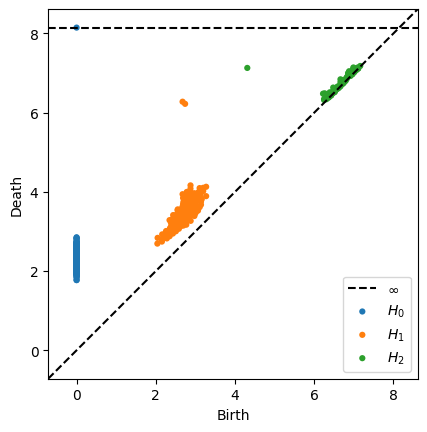

In [11]:
plt.rcParams['text.usetex'] = False
points_df = pd.read_csv('points400_2.csv', header=None)
results = ripser(points_df, maxdim=2)
diagrams = results['dgms']
diagrams = results['dgms']
plt.figure()
plot_diagrams(diagrams, show=True)

Betti numbers: [1, 2]


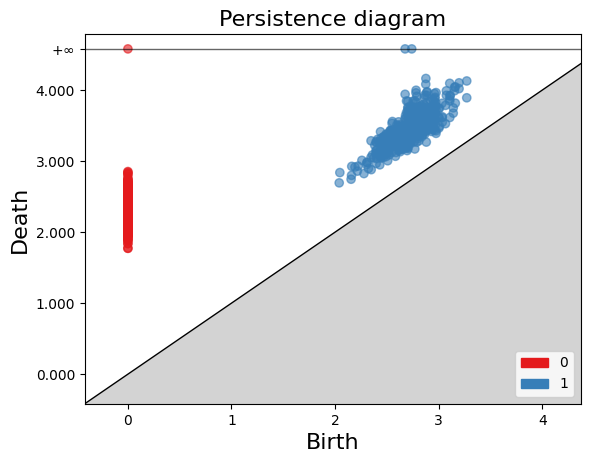

In [9]:
dist_matrix = distance_matrix(points_df, points_df)
rips_complex = gudhi.RipsComplex(distance_matrix=dist_matrix, max_edge_length=5)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()

gudhi.plot_persistence_diagram(persistence)

In [15]:
dist_matrix_df = pd.DataFrame(dist_matrix)
dist_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.000000,2.403758,3.442540,4.470286,4.933186,5.668963,6.139808,6.539730,7.041894,7.336452,...,7.802803,7.439073,7.097689,6.526121,6.206795,5.682070,5.204622,4.648010,3.729037,3.191359
1,2.403758,0.000000,2.464352,3.769006,4.307931,5.134110,5.649707,6.081942,6.618929,6.931485,...,7.433987,7.745128,7.417842,6.872951,6.570502,6.077262,5.633408,5.123591,4.307309,3.851229
2,3.442540,2.464352,0.000000,2.851731,3.533446,4.504004,5.083912,5.560305,6.143060,6.478615,...,7.112406,7.437013,7.732258,7.211163,6.923505,6.457285,6.041416,5.569076,4.828699,4.426668
3,4.470286,3.769006,2.851731,0.000000,2.086353,3.486213,4.208775,4.773324,5.441031,5.817222,...,6.554121,6.905024,7.222049,7.679849,7.410407,6.976800,6.593778,6.163913,5.504138,5.155055
4,4.933186,4.307931,3.533446,2.086353,0.000000,2.792993,3.655259,4.293221,5.025132,5.430212,...,6.215056,6.584054,6.915809,7.392597,7.651994,7.232885,6.864168,6.452341,5.825326,5.496679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,5.682070,6.077262,6.457285,6.976800,7.232885,7.626495,7.276134,6.921655,6.421872,6.091414,...,5.378897,4.815298,4.268915,3.222295,2.507200,0.000000,2.411539,3.364026,4.363376,4.819692
396,5.204622,5.633408,6.041416,6.593778,6.864168,7.277747,7.648939,7.312554,6.841387,6.532187,...,5.894748,5.385408,4.902974,4.024761,3.478731,2.411539,0.000000,2.345454,3.636417,4.172998
397,4.648010,5.123591,5.569076,6.163913,6.452341,6.890682,7.281632,7.562166,7.107565,6.810460,...,6.344226,5.873991,5.435099,4.658310,4.195560,3.364026,2.345454,0.000000,2.778916,3.451487
398,3.729037,4.307309,4.828699,5.504138,5.825326,6.307394,6.732302,7.034776,7.502204,7.221354,...,6.926152,6.498165,6.104316,5.424226,5.032405,4.363376,3.636417,2.778916,0.000000,2.047043


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

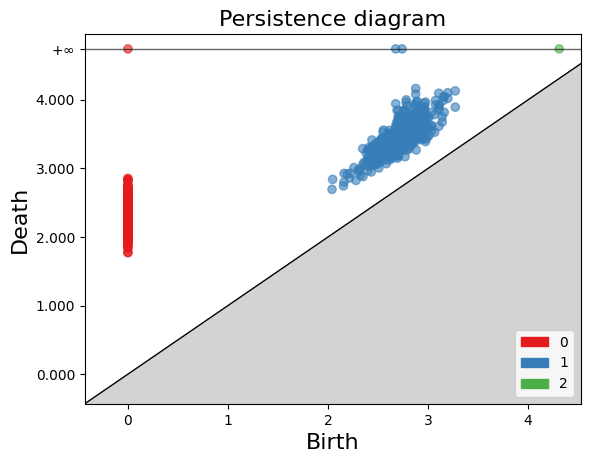

In [8]:
points_df = pd.read_csv('points400_2.csv', header=None)

# tree = cKDTree(points_df)
# edges = tree.sparse_distance_matrix(tree, max_distance=5, output_type="coo_matrix")
# simplex_tree = gudhi.SimplexTree()
# simplex_tree.insert_edges_from_coo_matrix(edges)
# simplex_tree.expansion(3)

persistence = simplex_tree.persistence()

gudhi.plot_persistence_diagram(persistence)

In [6]:
total_elements = edges.shape[0] * edges.shape[1]
non_zero_elements = edges.nnz
sparsity = (total_elements - non_zero_elements) / total_elements
print(sparsity)

0.91045
